In [1]:
#dataset link: https://drive.google.com/drive/folders/1n67sVTTzye4jtLfk8n-sa2fH2gTx5Ywt?usp=share_link

In [2]:
import tensorflow as tf
import numpy as np
import os
from keras_preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, auc

DATA_DIR = "../Dataset Korosi/"

In [3]:
## resep yang nemu di: https://www.kaggle.com/code/vortexkol/alexnet-cnn-architecture-on-tensorflow-beginner

# model_alexnet = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(150,150,3)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPool2D(pool_size=(2,2)),

#     tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPool2D(pool_size=(3,3)),

#     tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
#     tf.keras.layers.BatchNormalization(),

#     tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
#     tf.keras.layers.BatchNormalization(),

#     tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPool2D(pool_size=(2,2)),

#     tf.keras.layers.Flatten(),

#     tf.keras.layers.Dense(1024,activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(1024,activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(3,activation='softmax')  
# ])

## resep yang nemu di: https://medium.com/swlh/alexnet-with-tensorflow-46f366559ce8
def create_model(size):

    model_alexnet = tf.keras.models.Sequential()
    model_alexnet.add(tf.keras.layers.experimental.preprocessing.Resizing(size, size, interpolation="bilinear", input_shape=(size,size,3)))
    model_alexnet.add(tf.keras.layers.Conv2D(96, 11, strides=4, padding='same'))
    model_alexnet.add(tf.keras.layers.Lambda(tf.nn.local_response_normalization))
    model_alexnet.add(tf.keras.layers.Activation('relu'))
    model_alexnet.add(tf.keras.layers.MaxPooling2D(3, strides=2))
    model_alexnet.add(tf.keras.layers.Conv2D(256, 5, strides=4, padding='same'))
    model_alexnet.add(tf.keras.layers.Lambda(tf.nn.local_response_normalization))
    model_alexnet.add(tf.keras.layers.Activation('relu'))
    model_alexnet.add(tf.keras.layers.MaxPooling2D(3, strides=2))
    model_alexnet.add(tf.keras.layers.Conv2D(384, 3, strides=4, padding='same'))
    model_alexnet.add(tf.keras.layers.Activation('relu'))
    model_alexnet.add(tf.keras.layers.Conv2D(384, 3, strides=4, padding='same'))
    model_alexnet.add(tf.keras.layers.Activation('relu'))
    model_alexnet.add(tf.keras.layers.Conv2D(256, 3, strides=4, padding='same'))
    model_alexnet.add(tf.keras.layers.Activation('relu'))
    model_alexnet.add(tf.keras.layers.Flatten())
    model_alexnet.add(tf.keras.layers.Dense(4096, activation='relu'))
    model_alexnet.add(tf.keras.layers.Dropout(0.5))
    model_alexnet.add(tf.keras.layers.Dense(4096, activation='relu'))
    model_alexnet.add(tf.keras.layers.Dropout(0.5))
    model_alexnet.add(tf.keras.layers.Dense(3, activation='softmax'))

    return model_alexnet


In [4]:
model_alexnet = create_model(224) ##alexnet terbaik di 224
model_alexnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 lambda (Lambda)             (None, 56, 56, 96)        0         
                                                                 
 activation (Activation)     (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         614656    
                                                        

In [5]:
import matplotlib.pyplot as plt

In [6]:
f = open("alexnet_pengujian_optimizer.csv", "w")
f.write("optimizer,loss,val_loss,acc,val_acc")
f.close()

f = open("alexnet_pengujian_optimizer_model_summary.txt", "w")
f.write("--------==== hasil model summary dari percobaan optimizer ====--------")
f.close()


In [7]:
# buat data pipeline
size = 224
TEST_DATA_DIR = '../testdata'
training_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2
        )

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

train_generator = training_datagen.flow_from_directory(DATA_DIR,  
                                                        subset='training',
                                                        batch_size=16,
                                                        class_mode='categorical',
                                                        target_size=(size,size))   
val_generator = training_datagen.flow_from_directory(DATA_DIR, 
                                                        subset='validation', 
                                                        batch_size=16,
                                                        class_mode='categorical',
                                                        target_size=(size,size))
test_generator = test_datagen.flow_from_directory(TEST_DATA_DIR, 
                                                        batch_size=16,
                                                        class_mode='categorical',
                                                        target_size=(size,size)) 

Found 532 images belonging to 3 classes.
Found 131 images belonging to 3 classes.
Found 73 images belonging to 3 classes.


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/50
34/34 - 30s - loss: 1.0853 - acc: 0.3985 - val_loss: 1.0732 - val_acc: 0.4122 - 30s/epoch - 885ms/step
Epoch 2/50
34/34 - 23s - loss: 1.0241 - acc: 0.4756 - val_loss: 1.0940 - val_acc: 0.3893 - 23s/epoch - 681ms/step
Epoch 3/50
34/34 - 22s - loss: 0.9219 - acc: 0.5959 - val_loss: 0.9242 - val_acc: 0.6260 - 22s/epoch - 652ms/step
Epoch 4/50
34/34 - 22s - loss: 0.9410 - acc: 0.5921 - val_loss: 1.1040 - val_acc: 0.4198 - 22s/epoch - 654ms/step
Epoch 5/50
34/34 - 22s - loss: 0.8698 - acc: 0.6184 - val_loss: 1.0842 - val_acc: 0.5267 - 22s/epoch - 653ms/step
Epoch 6/50
34/34 - 23s - loss: 0.8325 - acc: 0.6165 - val_loss: 0.8233 - val_acc: 0.5573 - 23s/epoch - 662ms/step
Epoch 7/50
34/34 - 22s - loss: 0.9007 - acc: 0.5940 - val_loss: 1.0990 - val_acc: 0.5115 - 22s/epoch - 661ms/step
Epoch 8/50
34/34 - 23s - loss: 0.9141 - 

<Figure size 640x480 with 0 Axes>

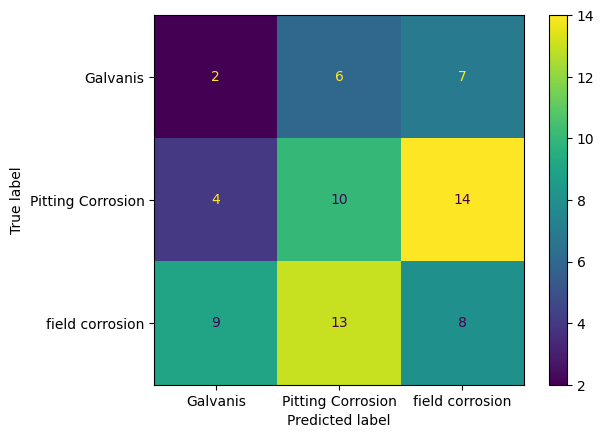

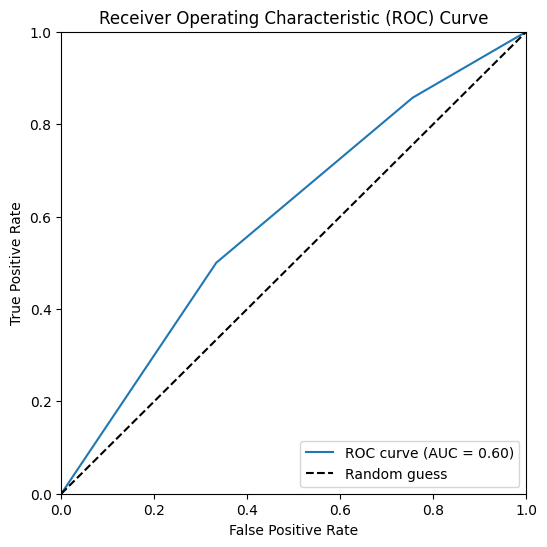

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/50
34/34 - 26s - loss: 1.0985 - acc: 0.3910 - val_loss: 1.0984 - val_acc: 0.4122 - 26s/epoch - 759ms/step
Epoch 2/50
34/34 - 25s - loss: 1.0984 - acc: 0.3835 - val_loss: 1.0983 - val_acc: 0.4122 - 25s/epoch - 728ms/step
Epoch 3/50
34/34 - 25s - loss: 1.0983 - acc: 0.3929 - val_loss: 1.0981 - val_acc: 0.4122 - 25s/epoch - 725ms/step
Epoch 4/50
34/34 - 25s - loss: 1.0981 - acc: 0.4004 - val_loss: 1.0979 - val_acc: 0.4122 - 25s/epoch - 724ms/step
Epoch 5/50
34/34 - 25s - loss: 1.0979 - acc: 0.4154 - val_loss: 1.0978 - val_acc: 0.4122 - 25s/epoch - 736ms/step
Epoch 6/50
34/34 - 25s - loss: 1.0978 - acc: 0.3947 - val_loss: 1.0976 - val_acc: 0.4122 - 25s/epoch - 723ms/step
Epoch 7/50
34/34 - 25s - loss: 1.0977 - acc: 0.3966 - val_loss: 1.0975 - val_acc: 0.4122 - 25s/epoch - 746ms/step
Epoch 8/50
34/34 - 25s - loss: 1.0975 - 

c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Figure size 640x480 with 0 Axes>

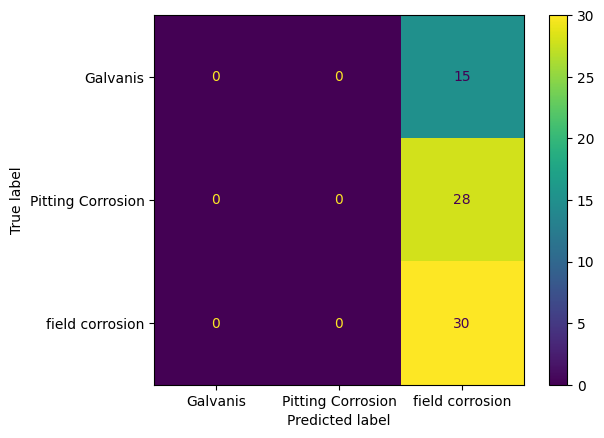

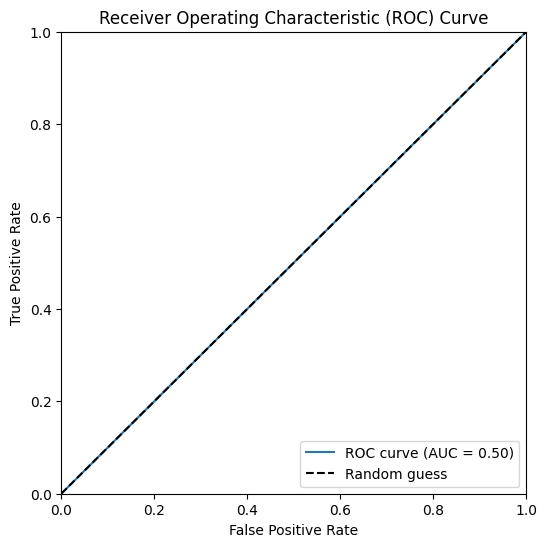

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/50
34/34 - 27s - loss: 1.0818 - acc: 0.4248 - val_loss: 1.0746 - val_acc: 0.4122 - 27s/epoch - 795ms/step
Epoch 2/50
34/34 - 25s - loss: 1.0158 - acc: 0.5207 - val_loss: 1.0267 - val_acc: 0.5496 - 25s/epoch - 733ms/step
Epoch 3/50
34/34 - 25s - loss: 0.9446 - acc: 0.5695 - val_loss: 0.9884 - val_acc: 0.5573 - 25s/epoch - 736ms/step
Epoch 4/50
34/34 - 25s - loss: 0.8826 - acc: 0.6203 - val_loss: 0.8958 - val_acc: 0.6718 - 25s/epoch - 723ms/step
Epoch 5/50
34/34 - 25s - loss: 0.8794 - acc: 0.5977 - val_loss: 0.9951 - val_acc: 0.4733 - 25s/epoch - 731ms/step
Epoch 6/50
34/34 - 25s - loss: 0.8721 - acc: 0.5902 - val_loss: 0.9438 - val_acc: 0.5191 - 25s/epoch - 736ms/step
Epoch 7/50
34/34 - 25s - loss: 0.8157 - acc: 0.6372 - val_loss: 0.9556 - val_acc: 0.5267 - 25s/epoch - 738ms/step
Epoch 8/50
34/34 - 25s - loss: 0.8233 - 

<Figure size 640x480 with 0 Axes>

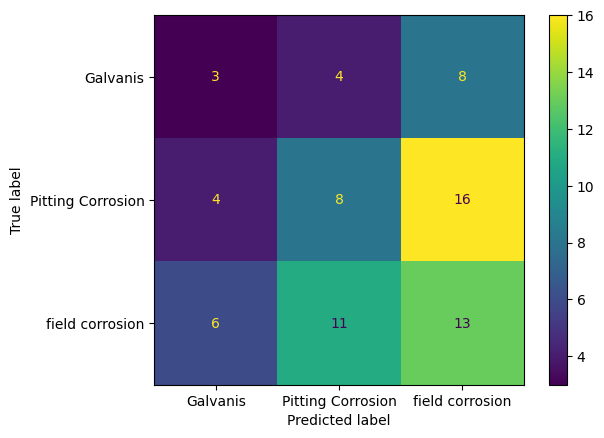

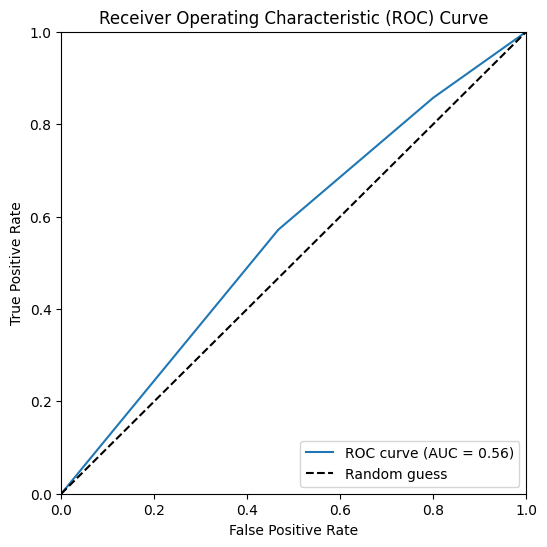

<Figure size 640x480 with 0 Axes>

In [8]:
from contextlib import redirect_stdout

LEARNING_RATE = 0.0001
OPTIMIZERS = [  [tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),"Adam"],
                [tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE),"SGD"],
                [tf.keras.optimizers.RMSprop(learning_rate=LEARNING_RATE),"RMSProp"]]


for optimizer in OPTIMIZERS:
    model_alexnet = create_model(size)
    
    with open('alexnet_pengujian_optimizer_model_summary.txt', 'w') as f:
        f.write("\n Optimizer: "+str(optimizer[1])+" \n")
        with redirect_stdout(f):
            model_alexnet.summary()
    f.close()

    Wsave = model_alexnet.get_weights()
    tf.keras.utils.plot_model(model_alexnet,to_file="./"+str(optimizer[1])+"_alexnet.png")    
    
    model_alexnet.set_weights(Wsave)
    model_alexnet.compile(  optimizer=optimizer[0], 
                            loss=tf.keras.losses.CategoricalCrossentropy(),
                            metrics=['acc']
                            )
    history = model_alexnet.fit(train_generator,validation_data=val_generator,epochs=50, verbose = 2)

    f = open("alexnet_pengujian_optimizer.csv", "a")
    f.write("\n"+str(optimizer[1])+","+
        str(history.history['loss'][-1])+","+
        str(history.history['val_loss'][-1])+","+
        str(history.history['acc'][-1])+","+
        str(history.history['val_acc'][-1])
    )
    f.close()
     
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss Model')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./alexnet/loss_'+str(optimizer[1])+'.png')
    plt.cla()
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./alexnet/acc_'+str(optimizer[1])+'.png')
    
    plt.clf()

    PLOT_PARAM = optimizer[1] # CHANGE THIS PARAMETER DEPEND ON THE SIZE
    # Making Confusion Matrix
    # Get the predictions for the test data
    test_pred = np.argmax(model_alexnet.predict(test_generator), axis=1)
    test_label_num = test_generator.labels
    test_label_classes = test_generator.class_indices

    # convert the numerical label into string one by extracting the key
    test_label_str = [list(test_label_classes.keys())[list(test_label_classes.values()).index(val)] for val in test_label_num]
    test_pred_str = [list(test_label_classes.keys())[list(test_label_classes.values()).index(val)] for val in test_pred]

    # Create the confusion matrix
    conf_mat = ConfusionMatrixDisplay.from_predictions(
        test_label_str, test_pred_str
    )

    fig, ax = plt.subplots(figsize=(6,6))
    conf_mat.plot(ax=ax)
    ax.set_title('Confusion Matrix')
    # fig.subplots_adjust(right=1) # Adjust the layout to align the plot to the right 
    plt.savefig(f'./alexnet/confusion_matrix_{PLOT_PARAM}.png')
    plt.clf()

    # print the classification report
    clas_rep = classification_report(test_label_str, test_pred_str)

    # # Save the markdown table to a file
    with open(f'./alexnet/classification_report_{PLOT_PARAM}.txt', 'w') as f:
        f.write(clas_rep)
    # print(clas_rep)

    # ROC curve
    # calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
    fpr, tpr, thresholds = roc_curve(test_label_num, test_pred, pos_label=1)

    # calculate the area under the ROC curve (AUC)
    roc_auc = auc(fpr, tpr)

    # plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    plt.savefig(f'./alexnet/roc_curve_{PLOT_PARAM}.png')
    plt.show()
    plt.clf()

In [9]:
def create_mobilenet(size):

    mobilenet = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(size,size,3),
    weights=None,
    include_top=False,
    )
    
    model_mobilenet = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer( input_shape=(size,size,3)),
    mobilenet,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
    ])
    return model_mobilenet

mobilenet = create_mobilenet(128) #overfit, tapi hasil terbaik ya 128
mobilenet.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_4 (Flatten)         (None, 20480)             0         
                                                                 
 dropout_8 (Dropout)         (None, 20480)             0         
                                                                 
 dense_12 (Dense)            (None, 512)               10486272  
                                                                 
 dense_13 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 12,745,795
Trainable params: 12,711,683
Non-trainable params: 34,112
_____________________________________

In [10]:
f = open("mobilenet_pengujian_resize.csv", "w")
f.write("size,loss,val_loss,acc,val_acc")
f.close()

f = open("mobilenet_pengujian_resize_model_summary.txt", "w")
f.write("--------==== hasil model summary dari percobaan resize ====--------")
f.close()


In [11]:
size = 128    
TEST_DATA_DIR = '../testdata'
training_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2
        )

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

train_generator = training_datagen.flow_from_directory(DATA_DIR,  
                                                        subset='training',
                                                        batch_size=16,
                                                        class_mode='categorical',
                                                        target_size=(size,size))   
val_generator = training_datagen.flow_from_directory(DATA_DIR, 
                                                        subset='validation', 
                                                        batch_size=16,
                                                        class_mode='categorical',
                                                        target_size=(size,size))
test_generator = test_datagen.flow_from_directory(TEST_DATA_DIR, 
                                                        batch_size=16,
                                                        class_mode='categorical',
                                                        target_size=(size,size)) 

Found 532 images belonging to 3 classes.
Found 131 images belonging to 3 classes.
Found 73 images belonging to 3 classes.


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/50
34/34 - 28s - loss: 1.4625 - acc: 0.4699 - val_loss: 1.0972 - val_acc: 0.3740 - 28s/epoch - 821ms/step
Epoch 2/50
34/34 - 21s - loss: 1.1124 - acc: 0.4680 - val_loss: 1.0931 - val_acc: 0.4122 - 21s/epoch - 615ms/step
Epoch 3/50
34/34 - 21s - loss: 1.0458 - acc: 0.4831 - val_loss: 1.0911 - val_acc: 0.3740 - 21s/epoch - 605ms/step
Epoch 4/50
34/34 - 21s - loss: 0.9655 - acc: 0.5226 - val_loss: 1.0889 - val_acc: 0.3740 - 21s/epoch - 608ms/step
Epoch 5/50
34/34 - 21s - loss: 0.9690 - acc: 0.5470 - val_loss: 1.0840 - val_acc: 0.3740 - 21s/epoch - 606ms/step
Epoch 6/50
34/34 - 21s - loss: 0.9250 - acc: 0.5432 - val_loss: 1.0848 - val_acc: 0.3740 - 21s/epoch - 603ms/step
Epoch 7/50
34/34 - 20s - loss: 0.8797 - acc: 0.5865 - val_loss: 1.0844 - val_acc: 0.3740 - 20s/epoch - 596ms/step
Epoch 8/50
34/34 - 20s - loss: 0.8677 - 

c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Figure size 640x480 with 0 Axes>

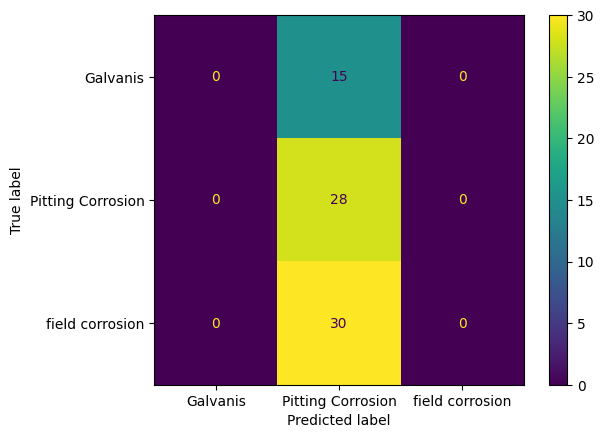

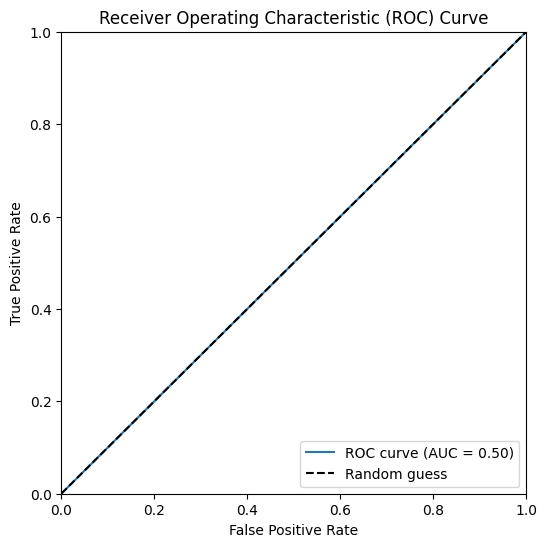

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/50
34/34 - 25s - loss: 1.3143 - acc: 0.3346 - val_loss: 1.0991 - val_acc: 0.3740 - 25s/epoch - 729ms/step
Epoch 2/50
34/34 - 20s - loss: 1.1918 - acc: 0.4023 - val_loss: 1.0996 - val_acc: 0.3740 - 20s/epoch - 596ms/step
Epoch 3/50
34/34 - 20s - loss: 1.1900 - acc: 0.4511 - val_loss: 1.1000 - val_acc: 0.3740 - 20s/epoch - 601ms/step
Epoch 4/50
34/34 - 20s - loss: 1.1185 - acc: 0.4680 - val_loss: 1.1004 - val_acc: 0.3740 - 20s/epoch - 602ms/step
Epoch 5/50
34/34 - 20s - loss: 1.1000 - acc: 0.4793 - val_loss: 1.1007 - val_acc: 0.3740 - 20s/epoch - 599ms/step
Epoch 6/50
34/34 - 20s - loss: 1.0933 - acc: 0.4887 - val_loss: 1.1012 - val_acc: 0.3740 - 20s/epoch - 602ms/step
Epoch 7/50
34/34 - 20s - loss: 1.0137 - acc: 0.5395 - val_loss: 1.1015 - val_acc: 0.3740 - 20s/epoch - 595ms/step
Epoch 8/50
34/34 - 21s - loss: 1.1080 - 

c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Figure size 640x480 with 0 Axes>

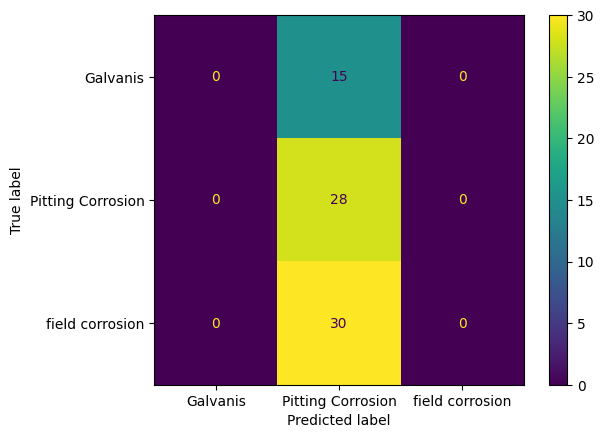

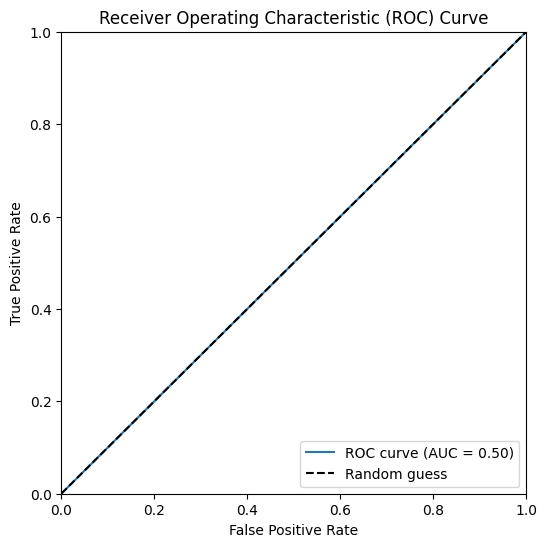

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/50
34/34 - 29s - loss: 2.0169 - acc: 0.3966 - val_loss: 1.0968 - val_acc: 0.3740 - 29s/epoch - 859ms/step
Epoch 2/50
34/34 - 20s - loss: 1.1174 - acc: 0.4680 - val_loss: 1.0951 - val_acc: 0.3740 - 20s/epoch - 599ms/step
Epoch 3/50
34/34 - 20s - loss: 1.0807 - acc: 0.4718 - val_loss: 1.0963 - val_acc: 0.3740 - 20s/epoch - 601ms/step
Epoch 4/50
34/34 - 21s - loss: 1.0057 - acc: 0.4850 - val_loss: 1.0883 - val_acc: 0.3740 - 21s/epoch - 611ms/step
Epoch 5/50
34/34 - 21s - loss: 0.9518 - acc: 0.5583 - val_loss: 1.0850 - val_acc: 0.3740 - 21s/epoch - 606ms/step
Epoch 6/50
34/34 - 21s - loss: 0.8981 - acc: 0.5714 - val_loss: 1.0828 - val_acc: 0.3740 - 21s/epoch - 613ms/step
Epoch 7/50
34/34 - 20s - loss: 0.8877 - acc: 0.6015 - val_loss: 1.0905 - val_acc: 0.3740 - 20s/epoch - 601ms/step
Epoch 8/50
34/34 - 21s - loss: 0.8700 - 

c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Figure size 640x480 with 0 Axes>

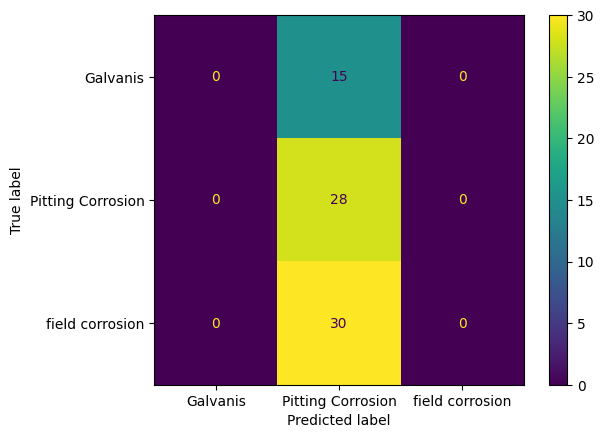

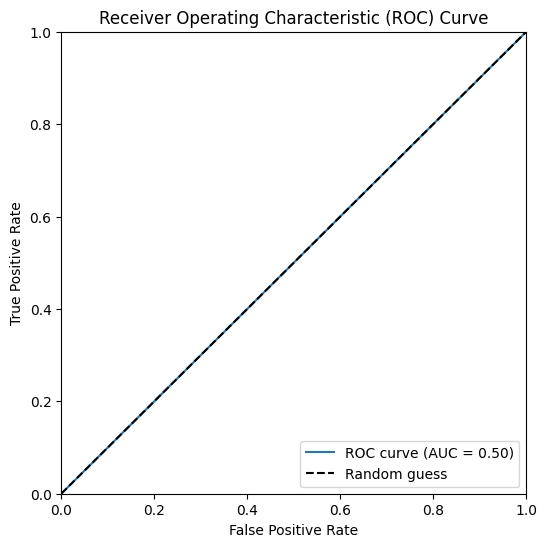

<Figure size 640x480 with 0 Axes>

In [12]:
OPTIMIZERS = [  [tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),"Adam"],
                [tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE),"SGD"],
                [tf.keras.optimizers.RMSprop(learning_rate=LEARNING_RATE),"RMSProp"]]

for optimizer in OPTIMIZERS:
    model_alexnet = create_mobilenet(size)
    
    with open('mobilenet_pengujian_optimizer_model_summary.txt', 'w') as f:
        f.write("\n Optimizer: "+str(optimizer[1])+" \n")
        with redirect_stdout(f):
            model_alexnet.summary()
    f.close()

    Wsave = model_alexnet.get_weights()
    tf.keras.utils.plot_model(model_alexnet,to_file="./"+str(optimizer[1])+"_mobilenet.png")    
    
    model_alexnet.set_weights(Wsave)
    model_alexnet.compile(  optimizer=optimizer[0], 
                            loss=tf.keras.losses.CategoricalCrossentropy(),
                            metrics=['acc']
                            )
    history = model_alexnet.fit(train_generator,validation_data=val_generator,epochs=50, verbose = 2)

    f = open("mobilenet_pengujian_optimizer.csv", "a")
    f.write("\n"+str(optimizer[1])+","+
        str(history.history['loss'][-1])+","+
        str(history.history['val_loss'][-1])+","+
        str(history.history['acc'][-1])+","+
        str(history.history['val_acc'][-1])
    )
    f.close()
     
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss Model')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./mobilenet/loss_'+str(optimizer[1])+'.png')
    plt.cla()
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./mobilenet/acc_'+str(optimizer[1])+'.png')
    
    plt.clf()

    PLOT_PARAM = optimizer[1] # CHANGE THIS PARAMETER DEPEND ON THE SIZE
    # Making Confusion Matrix
    # Get the predictions for the test data
    test_pred = np.argmax(model_alexnet.predict(test_generator), axis=1)
    test_label_num = test_generator.labels
    test_label_classes = test_generator.class_indices

    # convert the numerical label into string one by extracting the key
    test_label_str = [list(test_label_classes.keys())[list(test_label_classes.values()).index(val)] for val in test_label_num]
    test_pred_str = [list(test_label_classes.keys())[list(test_label_classes.values()).index(val)] for val in test_pred]

    # Create the confusion matrix
    conf_mat = ConfusionMatrixDisplay.from_predictions(
        test_label_str, test_pred_str
    )

    fig, ax = plt.subplots(figsize=(6,6))
    conf_mat.plot(ax=ax)
    ax.set_title('Confusion Matrix')
    # fig.subplots_adjust(right=1) # Adjust the layout to align the plot to the right 
    plt.savefig(f'./mobilenet/confusion_matrix_{PLOT_PARAM}.png')
    plt.clf()

    # print the classification report
    clas_rep = classification_report(test_label_str, test_pred_str)

    # # Save the markdown table to a file
    with open(f'./mobilenet/classification_report_{PLOT_PARAM}.txt', 'w') as f:
        f.write(clas_rep)
    # print(clas_rep)

    # ROC curve
    # calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
    fpr, tpr, thresholds = roc_curve(test_label_num, test_pred, pos_label=1)

    # calculate the area under the ROC curve (AUC)
    roc_auc = auc(fpr, tpr)

    # plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    plt.savefig(f'./mobilenet/roc_curve_{PLOT_PARAM}.png')
    plt.show()
    plt.clf()